# Erasmus student mobility (study exchanges and work placements in 2010-11)

## 1. Dataset information
#### This dataset contains the statistical overview of Erasmus mobility for students (study exchanges and work placements) in 2010-11. Statistics are presented at country and European level for various criteria, e.g.: age, gender, grant, duration, special needs, subject area, level of study, sending and receiving country, etc.\n",
#### The [Dataset Source](https://data.europa.eu/data/datasets/erasmus-facts-figures-trends-2010-2011?locale=en) is [The official portal for European data](https://data.europa.eu/en)."
   

In [62]:
import pandas as pd

In [63]:
import numpy as np

- Home Institution (Db:HomeInstitution): Erasmus ID code of the Sending Institution of the student

- Country Code of Home Institution (Db:CountryCodeofHomeInstitution) : The country of Home Institution where a student studies / is registered

- Age (Dd:Age)

- Gender (Db: Gender)

- Nationality (Db: Nationality)

- Subject Area (Db: SubjectArea)

- Years of HE Study Prior to Erasmus Study/Placement period (Db:YearsPrior)

- Host Institution (Db: HostInstitution): The institution at which the student spend its Erasmus period

- Country of Placement (Db: CountryOfWorkPlacement)

- Size of the Enterprise  (Db: EnterpriseSize)

- Type of Placement Sector (Db: TypeWorkSector)

- Length of Placement in Months (Db: LengthPlacement)

- Number of ECTS Credits Placement (Db: ECTSCreditsWork)

- Learning carried out in the national language of Host country (Db: TaughtHostLang): Whether the student has carried out the training in the language of the Host Country

- Training Language (Db: LanguageTaught): The language in which the student has  undergone the training

- Linguistic Preparation of Student (Db: LingPreparation) Reports whether a student has attended a language course including EILC course in the Host country or other courses in the Home or Host country, which are specifically related to ERASMUS. It is not a general question about their schooling.  

- Placement Grant (Db: PlacementGrant)

- Previous participation in the ERASMUS programme (Db: PreviousParticipation)

- Qualification received at the Host Country (Db: QualificationAtHost)
















### 1.1 Read dataset and a glance of the head of data

In [64]:
data=pd.read_csv("student_data_2010.csv",error_bad_lines=False,sep=";")
data.head()

/home/sluftsluft/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/home/sluftsluft/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (6,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,HOMEINSTITUTION,COUNTRYCODEOFHOMEINSTITUTION,AGE,GENDER,NATIONALITY,SUBJECTAREA,LEVELSTUDY,YEARSPRIOR,MOBILITYTYPE,HOSTINSTITUTION,...,ECTSCREDITSWORK,TOTALECTSCREDITS,SEVSUPPLEMENT,TAUGHTHOSTLANG,LANGUAGETAUGHT,LINGPREPARATION,STUDYGRANT,PLACEMENTGRANT,PREVIOUSPARTICIPATION,QUALIFICATIONATHOST
0,HU BUDAPES02,HU,25,M,HU,521,3,1,P,NaN,...,0,0,0,N,DE,NN,0.0,900.0,N,N
1,HU BUDAPES02,HU,28,M,HU,522,3,4,P,NaN,...,0,0,0,N,DE,NN,0.0,3600.0,N,N
2,HU BUDAPES02,HU,25,F,HU,581,2,5,P,NaN,...,0,0,0,N,EN,NN,0.0,1500.0,N,N
3,HU BUDAPES02,HU,23,M,SK,582,2,4,P,NaN,...,0,0,0,N,DE,NN,0.0,900.0,N,N
4,HU BUDAPES02,HU,24,F,HU,581,2,5,P,NaN,...,0,0,0,N,DE,NN,0.0,1800.0,N,N


In [65]:
# Raw data correlation:
data.corr()

,AGE,SUBJECTAREA,YEARSPRIOR,LENGTHSTUDYPERIOD,LENGTHPLACEMENT,ECTSCREDITSSTUDY,ECTSCREDITSWORK,TOTALECTSCREDITS,SEVSUPPLEMENT,STUDYGRANT,PLACEMENTGRANT
AGE,1.000000,0.078493,0.306658,-0.038877,0.040585,-0.074194,-0.011143,-0.086476,0.017427,-0.054869,0.042399
SUBJECTAREA,0.078493,1.000000,0.080222,-0.038184,0.047152,-0.043729,0.047112,-0.026345,-0.004119,-0.016517,0.042171
YEARSPRIOR,0.306658,0.080222,1.000000,0.065155,-0.000453,0.029501,-0.041541,0.013298,0.000712,-0.044569,-0.000487
LENGTHSTUDYPERIOD,-0.038877,-0.038184,0.065155,1.000000,-0.654320,0.796303,-0.474041,0.655828,0.007256,0.666006,-0.635888
LENGTHPLACEMENT,0.040585,0.047152,-0.000453,-0.654320,1.000000,-0.566718,0.720017,-0.291220,-0.004302,-0.509985,0.952559
ECTSCREDITSSTUDY,-0.074194,-0.043729,0.029501,0.796303,-0.566718,1.000000,-0.410575,0.908326,0.001270,0.547417,-0.550754
ECTSCREDITSWORK,-0.011143,0.047112,-0.041541,-0.474041,0.720017,-0.410575,1.000000,0.008446,-0.002981,-0.369473,0.656549
TOTALECTSCREDITS,-0.086476,-0.026345,0.013298,0.655828,-0.291220,0.908326,0.008446,1.000000,0.000026,0.430850,-0.302826
SEVSUPPLEMENT,0.017427,-0.004119,0.000712,0.007256,-0.004302,0.001270,-0.002981,0.000026,1.000000,0.010404,-0.003672
STUDYGRANT,-0.054869,-0.016517,-0.044569,0.666006,-0.509985,0.547417,-0.369473,0.430850,0.010404,1.000000,-0.495620


In [66]:
# Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231408 entries, 0 to 231407
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   HOMEINSTITUTION               231408 non-null  object 
 1   COUNTRYCODEOFHOMEINSTITUTION  231408 non-null  object 
 2   AGE                           231408 non-null  int64  
 3   GENDER                        231408 non-null  object 
 4   NATIONALITY                   231408 non-null  object 
 5   SUBJECTAREA                   231408 non-null  int64  
 6   LEVELSTUDY                    231408 non-null  object 
 7   YEARSPRIOR                    231408 non-null  int64  
 8   MOBILITYTYPE                  231408 non-null  object 
 9   HOSTINSTITUTION               190499 non-null  object 
 10  COUNTRYCODEOFHOSTINSTITUTION  190499 non-null  object 
 11  WORKPLACEMENT                 40964 non-null   object 
 12  COUNTRYOFWORKPLACEMENT        40964 non-null

In [67]:
# Description of the dataset:
data.describe()

,AGE,SUBJECTAREA,YEARSPRIOR,LENGTHSTUDYPERIOD,LENGTHPLACEMENT,ECTSCREDITSSTUDY,ECTSCREDITSWORK,TOTALECTSCREDITS,SEVSUPPLEMENT,STUDYGRANT,PLACEMENTGRANT
count,231408.000000,231408.000000,231408.000000,231408.000000,231408.000000,231408.000000,231408.000000,231408.000000,231408.000000,231408.000000,231408.000000
mean,22.513971,293.449233,2.730960,5.238561,0.767268,28.491802,2.587936,31.079738,2.139913,1217.708050,280.837386
std,2.703065,209.686161,1.307554,3.299730,1.861627,20.720936,8.667091,18.894579,103.269691,984.106146,701.147746
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,144.000000,2.000000,4.000000,0.000000,14.000000,0.000000,20.000000,0.000000,600.000000,0.000000
50%,22.000000,223.000000,2.000000,5.000000,0.000000,30.000000,0.000000,30.000000,0.000000,1095.840000,0.000000
75%,23.000000,380.000000,4.000000,9.000000,0.000000,39.000000,0.000000,40.000000,0.000000,1713.000000,0.000000
max,99.000000,869.000000,20.000000,12.000000,12.000000,90.000000,90.000000,90.000000,20559.000000,10970.000000,9600.000000


## 2. Data cleaning and wrangling

In [68]:
# Drop Nan values:
data.dropna(how="all",inplace=True)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231408 entries, 0 to 231407
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   HOMEINSTITUTION               231408 non-null  object 
 1   COUNTRYCODEOFHOMEINSTITUTION  231408 non-null  object 
 2   AGE                           231408 non-null  int64  
 3   GENDER                        231408 non-null  object 
 4   NATIONALITY                   231408 non-null  object 
 5   SUBJECTAREA                   231408 non-null  int64  
 6   LEVELSTUDY                    231408 non-null  object 
 7   YEARSPRIOR                    231408 non-null  int64  
 8   MOBILITYTYPE                  231408 non-null  object 
 9   HOSTINSTITUTION               190499 non-null  object 
 10  COUNTRYCODEOFHOSTINSTITUTION  190499 non-null  object 
 11  WORKPLACEMENT                 40964 non-null   object 
 12  COUNTRYOFWORKPLACEMENT        40964 non-null

Comment: it is clear from the Dataset info that there are 3 kinds of Erasmus exchange: work placement, study and combination. As combination accounted for a small proportion of the total, the author decided to ignore them and consider them as a part of workplacement.

In [70]:
student_with_workplacement=data[data.WORKPLACEMENT.notnull()]

In [71]:
len(student_with_workplacement)

40964

In [72]:
student_without_workplacement=data[~data.WORKPLACEMENT.notnull()]

In [73]:
len(student_without_workplacement)

190444

## 3. Analyzing Dataset of workplacement group
Placement Enterprise
Db: WorkPlacement
- The name of the company/organisation at which the student undertook a  placement
(in latin characters).

    + C19.1 If " Type of mobility " = 'P', then "Placement Enterprise" cannot be empty
    + C19.2 If " Type of mobility " is not P, then "Placement Enterprise" must be empty
    + C19.2 Length ≤ 255


In [74]:
student_with_workplacement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40964 entries, 0 to 231407
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   HOMEINSTITUTION               40964 non-null  object 
 1   COUNTRYCODEOFHOMEINSTITUTION  40964 non-null  object 
 2   AGE                           40964 non-null  int64  
 3   GENDER                        40964 non-null  object 
 4   NATIONALITY                   40964 non-null  object 
 5   SUBJECTAREA                   40964 non-null  int64  
 6   LEVELSTUDY                    40964 non-null  object 
 7   YEARSPRIOR                    40964 non-null  int64  
 8   MOBILITYTYPE                  40964 non-null  object 
 9   HOSTINSTITUTION               55 non-null     object 
 10  COUNTRYCODEOFHOSTINSTITUTION  55 non-null     object 
 11  WORKPLACEMENT                 40964 non-null  object 
 12  COUNTRYOFWORKPLACEMENT        40964 non-null  object 
 13  

### Drop of irrelevant columns 

In [75]:
student_with_workplacement.drop(columns=["HOSTINSTITUTION","COUNTRYCODEOFHOSTINSTITUTION","STUDYSTARTDATE","ECTSCREDITSSTUDY","STUDYGRANT"], axis=1,inplace=True)

/home/sluftsluft/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [76]:
student_with_workplacement.head()

,HOMEINSTITUTION,COUNTRYCODEOFHOMEINSTITUTION,AGE,GENDER,NATIONALITY,SUBJECTAREA,LEVELSTUDY,YEARSPRIOR,MOBILITYTYPE,WORKPLACEMENT,...,CONSORTIUMAGREEMENTNUMBER,ECTSCREDITSWORK,TOTALECTSCREDITS,SEVSUPPLEMENT,TAUGHTHOSTLANG,LANGUAGETAUGHT,LINGPREPARATION,PLACEMENTGRANT,PREVIOUSPARTICIPATION,QUALIFICATIONATHOST
0,HU BUDAPES02,HU,25,M,HU,521,3,1,P,HOCHSCHULE WISMAR,...,NaN,0,0,0,N,DE,NN,900.0,N,N
1,HU BUDAPES02,HU,28,M,HU,522,3,4,P,ACMIT,...,NaN,0,0,0,N,DE,NN,3600.0,N,N
2,HU BUDAPES02,HU,25,F,HU,581,2,5,P,S.C.ESZTÃ¡NY STUDIO S.R.L.,...,NaN,0,0,0,N,EN,NN,1500.0,N,N
3,HU BUDAPES02,HU,23,M,SK,582,2,4,P,TECHNISCHE UNIVERSITAT DARMSTADT,...,NaN,0,0,0,N,DE,NN,900.0,N,N
4,HU BUDAPES02,HU,24,F,HU,581,2,5,P,H.E.I.Z. HAUS ARCHITEKTUR STADTPLANUNG,...,NaN,0,0,0,N,DE,NN,1800.0,N,N


### Drop duplicated columns

In [77]:
student_with_workplacement.duplicated().sum()

1272

In [78]:
new_data=student_with_workplacement[~student_with_workplacement.duplicated()]

In [79]:
len(new_data)

39692

In [80]:
new_data.corr()

,AGE,SUBJECTAREA,YEARSPRIOR,LENGTHSTUDYPERIOD,LENGTHPLACEMENT,ECTSCREDITSWORK,TOTALECTSCREDITS,SEVSUPPLEMENT,PLACEMENTGRANT
AGE,1.000000,0.097224,0.306283,-0.012202,0.007623,-0.101139,-0.102050,0.003963,0.019071
SUBJECTAREA,0.097224,1.000000,0.046106,-0.011980,-0.028010,0.022705,0.020834,-0.003557,-0.039471
YEARSPRIOR,0.306283,0.046106,1.000000,-0.017352,0.092399,-0.080503,-0.082086,0.000611,0.080890
LENGTHSTUDYPERIOD,-0.012202,-0.011980,-0.017352,1.000000,-0.075454,-0.032733,0.076866,-0.000567,-0.066610
LENGTHPLACEMENT,0.007623,-0.028010,0.092399,-0.075454,1.000000,0.417290,0.407597,0.004753,0.800821
ECTSCREDITSWORK,-0.101139,0.022705,-0.080503,-0.032733,0.417290,1.000000,0.992791,0.003001,0.257351
TOTALECTSCREDITS,-0.102050,0.020834,-0.082086,0.076866,0.407597,0.992791,1.000000,0.002928,0.249201
SEVSUPPLEMENT,0.003963,-0.003557,0.000611,-0.000567,0.004753,0.003001,0.002928,1.000000,0.008594
PLACEMENTGRANT,0.019071,-0.039471,0.080890,-0.066610,0.800821,0.257351,0.249201,0.008594,1.000000


<AxesSubplot:>

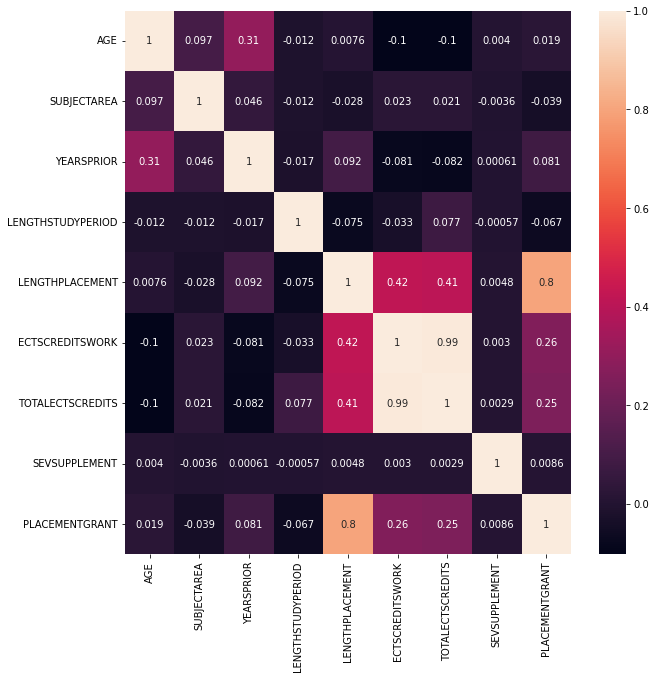

In [81]:
import matplotlib.pyplot as plt  
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(new_data.corr(),annot=True)

Placement grant has a positive correlation with the length of work placement, ECTS credit earned from work placement, but negative correlation with subject area. ECTS Credits earned from work placement also has a positive correlation with length of placement, but a negative correlation with age, years prior this exchange.

## 3.1 Analysing the connection between Gender and Placement grant

In [82]:
gender=pd.DataFrame(new_data.GENDER.value_counts())
gender.reset_index()
gender.rename(columns={"index": "Female/Male", "GENDER": "Number of student"},inplace=True)

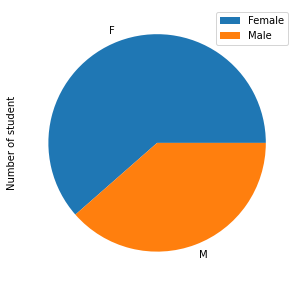

In [83]:
plot = gender.plot.pie(y='Number of student', figsize=(5, 5)).legend(["Female","Male"])

In [84]:
gender_grant=new_data[["GENDER","PLACEMENTGRANT"]]
gender_grant

,GENDER,PLACEMENTGRANT
0,M,900.00
1,M,3600.00
2,F,1500.00
3,M,900.00
4,F,1800.00
...,...,...
231401,F,0.00
231403,M,0.00
231404,M,0.00
231405,M,1101.48


In [85]:
gender_grant_df=pd.pivot_table(gender_grant, values='PLACEMENTGRANT', index=['GENDER'],  aggfunc=np.average)
gender_grant_df.reset_index()

,GENDER,PLACEMENTGRANT
0,F,1582.060245
1,M,1600.370493


In [86]:
gender_grant_df.rename(columns={"GENDER": "Gender", "PLACEMENTGRANT": "Amount of placement grant"},inplace=True)

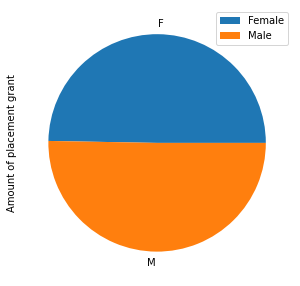

In [87]:
plot = gender_grant_df.plot.pie(y='Amount of placement grant', figsize=(5, 5)).legend(["Female","Male"])

Conclusion: Although female students accounted for the greater percentage of participants, they received a bit lower placement grant compared with that of the couterpart.

## 3.2 Analysing the connection between Nationality and Placement grant

###### Db: Nationality
- Nationality of student
- String of 2 characters in the set “ISO Country Codes” 

In [88]:
new_data.NATIONALITY.value_counts()

FR    5793
DE    5396
ES    4456
UK    3664
PL    2541
IT    2267
NL    2165
TR    1130
BE    1101
RO    1080
FI    1030
XX     881
PT     871
HU     849
LT     818
CZ     805
AT     799
IE     584
LV     550
GR     549
SK     475
BG     461
DK     434
SE     283
SI     267
EE     207
NO     129
CY      55
IS      29
LU      18
LI       5
Name: NATIONALITY, dtype: int64

In [89]:
nationality_grant=new_data[["NATIONALITY","PLACEMENTGRANT"]]
nationality_grant

,NATIONALITY,PLACEMENTGRANT
0,HU,900.00
1,HU,3600.00
2,HU,1500.00
3,SK,900.00
4,HU,1800.00
...,...,...
231401,LT,0.00
231403,LT,0.00
231404,LT,0.00
231405,LT,1101.48


In [90]:
dict_={"CY":"Cyprus", "UK": "United Kingdom", "GR":"Greece", "IE":"Ireland", "IS":"Iceland", "RO":"Romania", "TR":"Turkey","BG":" Bulgaria","SE":"Sweden","IT":"Italy"}


In [91]:
import numpy as np
nationality_grant=pd.pivot_table(nationality_grant, values='PLACEMENTGRANT', index=['NATIONALITY'],  
               aggfunc=np.average).sort_values(by="PLACEMENTGRANT",ascending=False)[:10]
nationality_grant.index
s = nationality_grant.index.to_series()
nationality_grant.index = np.array(s.map(dict_).fillna(s),ndmin =1)
nationality_grant.reset_index(inplace=True)

In [92]:
nationality_grant

,index,PLACEMENTGRANT
0,Cyprus,2709.344909
1,United Kingdom,2699.632522
2,Greece,2586.552732
3,Ireland,2183.634949
4,Iceland,1976.034483
5,Romania,1972.615315
6,Turkey,1960.536274
7,Bulgaria,1941.630477
8,Sweden,1900.758304
9,Italy,1892.834760


Conclusion: A glance from the table of top 10 placement grants shows that there is a difference between grants of diffirent nationalities. People from Cyprus the biggest grant of 2709 on average while the minimum grant belongs to Italians. The difference in grant between those two nationalities is 1.5 times

## 3.3 Analysing the connection between Subject area and Placement grant
 

In [93]:
new_data.SUBJECTAREA.unique()

array([521, 522, 581, 582, 481, 524,  34, 223, 344, 525,  99, 342, 541,
       313, 629, 622, 314,  38, 443, 345,  21, 225, 312, 144, 311, 489,
        52, 529, 721, 813, 727, 724, 214, 340, 212,  72, 421, 723,  32,
        62,  14, 213, 720, 319,  58, 221, 762, 211,  22, 589, 640, 621,
       543, 840, 349, 222,  46, 620, 623,  31, 726, 729, 725,  54, 523,
       149, 142, 441, 442, 429, 812, 322, 219, 140, 145,  48,  76, 346,
       461, 440, 310,   6, 769, 811, 329,   5, 229, 321, 850, 520, 422,
       343,  84, 624, 449, 226, 462, 347, 380, 220,   3,   4, 143, 851,
         2, 761, 540,   0, 341, 210, 815,   7,  64,   1, 862, 852, 859,
        44, 549, 542, 146,  85, 482,   8,  42, 215, 860, 141, 819, 861,
       469, 814,  10,  81, 853, 544, 869,   9,  90])

In [94]:
subject_area=pd.DataFrame(new_data.SUBJECTAREA.value_counts())


##### Top 10 subject area


In [95]:
top_10=subject_area[:10]
top_10

,SUBJECTAREA
64,5355
222,3851
340,1904
34,1773
345,1254
314,1216
421,1040
721,941
214,863
52,857


In [96]:
s = top_10.index.to_series()

In [97]:
dict_={64:"Veterinary",222:"Foreign languages",340:"Business and administration (broad)",
                34:"Business and administration",345:"Management and administration",
                314:"Economics",421:"Biology and biochemistry",721:"Medicine",
                214:"Design",52:"Engineering and engineering trades"}


In [98]:
import numpy as np
top_10.index = np.array(s.map(dict_).fillna(s),ndmin =1)
top_10.reset_index(inplace=True)


In [99]:
top_10

,index,SUBJECTAREA
0,Veterinary,5355
1,Foreign languages,3851
2,Business and administration (broad),1904
3,Business and administration,1773
4,Management and administration,1254
5,Economics,1216
6,Biology and biochemistry,1040
7,Medicine,941
8,Design,863
9,Engineering and engineering trades,857


In [100]:
top_10.rename(columns={"index": "Subject area", "SUBJECTAREA": "Number of student"},inplace=True)

/home/sluftsluft/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [101]:
import seaborn as sns
top_10


,Subject area,Number of student
0,Veterinary,5355
1,Foreign languages,3851
2,Business and administration (broad),1904
3,Business and administration,1773
4,Management and administration,1254
5,Economics,1216
6,Biology and biochemistry,1040
7,Medicine,941
8,Design,863
9,Engineering and engineering trades,857


<AxesSubplot:xlabel='Number of student', ylabel='Subject area'>

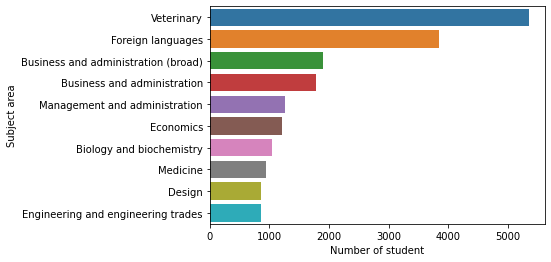

In [102]:
sns.barplot(y=top_10['Subject area'],x=top_10['Number of student'])
#sns.boxplot(y=subset.index,x=subset.values)

Conclusion: A large percentage of students joined the program with veterinary background, followed by those from foreign languges and business. Those with social and business backgrounds are more engaging in Eramus exchange than those from science and technology background.

## 3.4 Analysing the connection between Enterprise size and Placement grant
 

### Enterprise size

- 'M':'Medium (51-250 staff)'
- 'S':'Small (<=50 staff)'
- 'L':'Large  (>250 staff)

In [103]:
new_data.ENTERPRISESIZE

0         M
1         M
2         S
3         L
4         M
         ..
231401    L
231403    L
231404    L
231405    M
231406    M
Name: ENTERPRISESIZE, Length: 39692, dtype: object

In [104]:
new_data.ENTERPRISESIZE.unique()

array(['M', 'S', 'L'], dtype=object)

In [105]:
new_data['enterprise_size']=new_data.ENTERPRISESIZE.replace({'M':'Medium', 'S':'Small', 'L':'Large'})

/tmp/ipykernel_2281/3477721016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['enterprise_size']=new_data.ENTERPRISESIZE.replace({'M':'Medium', 'S':'Small', 'L':'Large'})


In [106]:
#data1.drop(columns=["ENTERPRISESIZE"],inplace=True)

new_data.enterprise_size.value_counts()

Small     16622
Medium    13255
Large      9815
Name: enterprise_size, dtype: int64

In [107]:
new_data[['enterprise_size','PLACEMENTGRANT']].groupby('enterprise_size').mean()

,PLACEMENTGRANT
enterprise_size,
Large,1712.560646
Medium,1637.480773
Small,1477.657225


In [108]:
new_data[['enterprise_size','LENGTHPLACEMENT']].groupby('enterprise_size').mean()

,LENGTHPLACEMENT
enterprise_size,
Large,4.717753
Medium,4.525141
Small,3.990630


Conclusion: The bigger the size of enterprise, the more money grant the students can receive

## 3.5 Analysing the connection between  Type of work sector and Placement grant

In [109]:
new_data.TYPEWORKSECTOR.unique()

array(['P', 'M', 'F', 'C', 'S', 'N', 'H', 'J', 'O', 'A', 'K', 'G', 'I',
       'R', 'Q', 'E', 'T', 'U', 'L', 'B', 'D'], dtype=object)

In [110]:
top_10_work_sector=pd.DataFrame(new_data.TYPEWORKSECTOR.value_counts()[:10])

top_10_work_sector.reset_index()


,index,TYPEWORKSECTOR
0,P,6840
1,M,5583
2,S,3744
3,Q,3536
4,I,3087
5,C,2947
6,R,2586
7,J,2528
8,N,1866
9,F,1270


In [111]:
dict1=({"P":"Education","M":"Technical activities ",
                                             "S":"Other services","Q":"Human and social work",
                                             "I":"Accommodation and food service","C":"Manufacture of metal product",
                                             "R":"Arts","J":"Information and communication ",
                                             "N":"Administrative and support service",
                                             "F":"Construction"})

 #### Top 10 sectors that most students attended in their work placement

In [112]:
top_10_work_sector

,TYPEWORKSECTOR
P,6840
M,5583
S,3744
Q,3536
I,3087
C,2947
R,2586
J,2528
N,1866
F,1270


In [113]:
top_10_work_sector=top_10_work_sector.reset_index()
top_10_work_sector

,index,TYPEWORKSECTOR
0,P,6840
1,M,5583
2,S,3744
3,Q,3536
4,I,3087
5,C,2947
6,R,2586
7,J,2528
8,N,1866
9,F,1270


In [114]:
top_10_work_sector.rename(columns={"index": "Work sector", "TYPEWORKSECTOR": "Number of student"},inplace=True)

<AxesSubplot:xlabel='Number of student', ylabel='Work sector'>

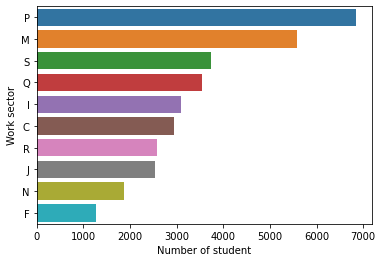

In [115]:
import seaborn as sns

sns.barplot(y=top_10_work_sector["Work sector"],x=top_10_work_sector["Number of student"])

Conclution: The larger proportion of students joined the work place in education work sector, followed by those working in technical activities. Social activities sectors had more participants than those from technical activities sectors.

## 3.6 Analysing the connection between Enterprise size, Work sector and Placement grant relationship

In [116]:
grouped=new_data[['enterprise_size','TYPEWORKSECTOR','PLACEMENTGRANT']].groupby(['enterprise_size','TYPEWORKSECTOR']).mean()

In [117]:
grouped

PLACEMENTGRANT
enterprise_size TYPEWORKSECTOR                
Large           A                  1534.451197
                B                  1753.158696
                C                  1818.062289
                D                  1903.158958
                E                  1377.842800
...                                        ...
Small           Q                  1416.419359
                R                  1446.948076
                S                  1429.112970
                T                  1148.362632
                U                  1562.208327

[63 rows x 1 columns]

In [118]:
grant_by_sector_and_size=grouped.unstack(0).fillna(0)
grant_by_sector_and_size

PLACEMENTGRANT                          
enterprise_size          Large       Medium        Small
TYPEWORKSECTOR                                          
A                  1534.451197  1403.312798  1300.524709
B                  1753.158696  1331.852941  1386.477273
C                  1818.062289  1425.936452  1322.546159
D                  1903.158958  1505.919404  1335.659051
E                  1377.842800  1797.110816  1483.733265
F                  1738.044331  1478.165660  1538.656340
G                  1963.210389  1428.304850  1235.850970
H                  1855.487758  1788.245625  1338.686080
I                  1510.197446  1439.762300  1270.707854
J                  2118.051338  1535.878561  1432.904399
K                  2024.015405  1672.047712  1572.003833
L                  1685.232143  1693.033750  1338.674833
M                  1845.069530  1640.383445  1575.081071
N                  1700.388145  1552.055275  1492.714240
O                  1588.818487  1433.535405  1532.984395
P                  1687.596509  2102.091550  1808.520607
Q                  1379.826399  1345.454448  1416.419359
R                  1693.280000  1532.277126  1446.948076
S                  1692.059201  1570.693549  1429.112970
T                  1180.000000   635.966875  1148.362632
U                  1737.556136  1554.948679  1562.208327

#### Analyzing this relationship in large enterprise sector

In [119]:
large=pd.DataFrame(grouped.loc['Large'])

top_5_large_entreprise=large.sort_values(by='PLACEMENTGRANT',ascending=False)[:5]

In [120]:
top_5_large_entreprise

,PLACEMENTGRANT
TYPEWORKSECTOR,
J,2118.051338
K,2024.015405
G,1963.210389
D,1903.158958
H,1855.487758


In [121]:
dict_={"J":"Information and communication","K":"Financial and insurance activities",
                              "G":"Wholesale and retail trade",
                               "D":"Electricity supply","H":"Transporting and storage"}


In [122]:
s = top_5_large_entreprise.index.to_series()
top_5_large_entreprise.index = np.array(s.map(dict_).fillna(s))


In [123]:
import numpy as np
top_5_large_entreprise.reset_index(inplace=True)

In [124]:
top_5_large_entreprise

,index,PLACEMENTGRANT
0,Information and communication,2118.051338
1,Financial and insurance activities,2024.015405
2,Wholesale and retail trade,1963.210389
3,Electricity supply,1903.158958
4,Transporting and storage,1855.487758


In [125]:
top_5_large_entreprise.rename(columns={"index": "Work sector", "PLACEMENTGRANT": "Amount of placement grant"},inplace=True)


In [126]:
top_5_large_entreprise

,Work sector,Amount of placement grant
0,Information and communication,2118.051338
1,Financial and insurance activities,2024.015405
2,Wholesale and retail trade,1963.210389
3,Electricity supply,1903.158958
4,Transporting and storage,1855.487758


Conclusion: Large-sized companies who worked in information and communication sector and financial sector offered higher placement grant to students, compared to other sectors.

## 3.7 Analysing Number of ECTS credits for Placement 

### Number of ECTS credits for Placement anticipated 

- C29.1 Must be positive number
- C29.2 Between 0 and 90
- C29.3 Warning if >60
- C29.4 if " MobilityType " is not P, “Number of ECTS Credits Placement” = 0


In [127]:
credit_work=new_data.ECTSCREDITSWORK.value_counts().sort_values(ascending=False).nlargest(10)
credit_work_df=pd.DataFrame({"Number of credits":credit_work.index,
                            "Number of student":credit_work.values})


In [128]:
credit_work_df

,Number of credits,Number of student
0,0,13726
1,30,6633
2,15,2646
3,60,1893
4,20,1628
5,10,1372
6,18,1312
7,12,993
8,6,971
9,5,876


<AxesSubplot:xlabel='Number of credits', ylabel='Number of student'>

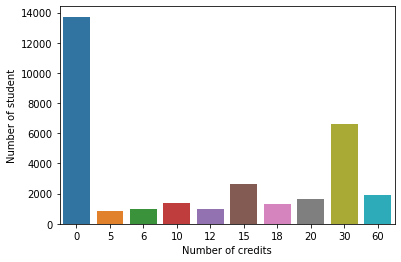

In [129]:
import seaborn as sns

sns.barplot(x=credit_work_df["Number of credits"],y=credit_work_df["Number of student"])

Conclusion: Because of the nature of work placement exchange, most of the students attended received no credits for their internship.

## 3.8 Analysing of workplacement language

### Learning carried out in the national language of Host country
##### Db: TaughtHostLang
- Whether the student has carried out the training in the language of the Host Country

In [130]:

taught_host_lang=pd.DataFrame(new_data.TAUGHTHOSTLANG.value_counts())
taught_host_lang

,TAUGHTHOSTLANG
Y,21793
N,17899


In [131]:
taught_host_lang.rename(columns={"index": "Yes/No", "TAUGHTHOSTLANG": "Number of student"},inplace=True)

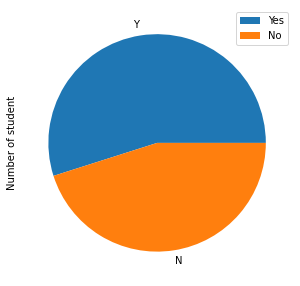

In [132]:
plot = taught_host_lang.plot.pie(y='Number of student', figsize=(5, 5)).legend(["Yes","No"])

## 3.9 Analysing of Training Language

##### Db: LanguageTaught
- The language in which the student has  undergone the training

In [133]:
language_taught=new_data.LANGUAGETAUGHT.value_counts().nlargest(10)
language_taught

EN    20918
ES     4887
FR     4724
DE     4556
IT     1693
NL      565
PT      397
TR      274
PL      215
SV      193
Name: LANGUAGETAUGHT, dtype: int64

#### Top 10 languages that student has carried out in the same language of the Host Country

In [134]:
undergone_host_lang=new_data[new_data.TAUGHTHOSTLANG=='Y']
top_10_lang_training=undergone_host_lang['LANGUAGETAUGHT'].value_counts()[:10]
top_10_lang_training

EN    8253
ES    3366
DE    3312
FR    3207
IT    1234
NL     474
PT     320
TR     236
SV     177
CS     175
Name: LANGUAGETAUGHT, dtype: int64

In [135]:
top_10_lang_training_df=pd.DataFrame({"Language":top_10_lang_training.index,
                            "Number of students":top_10_lang_training.values})


<AxesSubplot:xlabel='Number of students', ylabel='Language'>

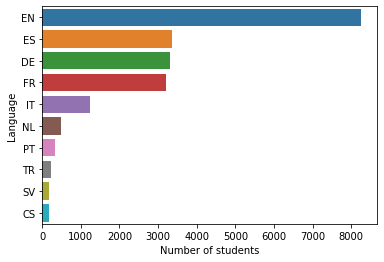

In [136]:
import seaborn as sns

sns.barplot(y=top_10_lang_training_df["Language"],x=top_10_lang_training_df["Number of students"])

## 3.10 Analysing of  Language Preparation
##### Db: LingPreparation
- Reports whether a student has attended a language course including EILC 
course in the Host country or other courses in the Home or Host country
- String of 2 characters in the set (EC, HS, HM, NN)
 + EC = EILC 
 + HS = Host
 + HM = Home
 + NN = None


In [137]:
ling_preparation=new_data.LINGPREPARATION
ling_preparation.value_counts()

NN    29171
HM     8664
HS     1776
EC       81
Name: LINGPREPARATION, dtype: int64

In [138]:
ling_preparation=new_data[new_data.LANGUAGETAUGHT!='NN']


In [139]:
top_10_ling_preparation=ling_preparation['LANGUAGETAUGHT'].value_counts()[:10]

In [140]:
top_10_ling_preparation

EN    20918
ES     4887
FR     4724
DE     4556
IT     1693
NL      565
PT      397
TR      274
PL      215
SV      193
Name: LANGUAGETAUGHT, dtype: int64

In [141]:
top_10_ling_preparation_df=pd.DataFrame({"Language":top_10_ling_preparation.index,
                            "Number of students attending":top_10_ling_preparation.values})


<AxesSubplot:xlabel='Number of students attending', ylabel='Language'>

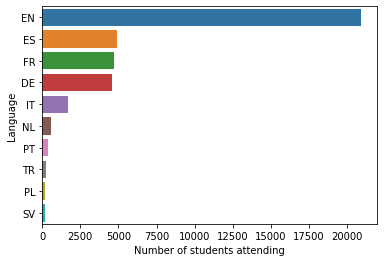

In [142]:
import seaborn as sns

sns.barplot(y=top_10_ling_preparation_df["Language"],x=top_10_ling_preparation_df["Number of students attending"])

Conclusion:Students who attended the workplacement with the language of English, Spanish, French and German usually have to attend language training courses before the workplacement.

## 3.11 Analysing of  Previous participation in the ERASMUS programme
###### Db: PreviousParticipation
- The field indicates whether the student has received an ERASMUS grant prior to this one and for which type of mobility. 
    + N = No
    + S = Study
    + P = Placement
    + M = Erasmus Mundus


In [143]:
new_data.PREVIOUSPARTICIPATION.value_counts()

N    34062
S     5596
P       17
M       17
Name: PREVIOUSPARTICIPATION, dtype: int64

In [144]:
new_data[["PREVIOUSPARTICIPATION","PLACEMENTGRANT"]].groupby("PREVIOUSPARTICIPATION").mean()

,PLACEMENTGRANT
PREVIOUSPARTICIPATION,
M,1893.955882
N,1585.701253
P,1679.039412
S,1608.704752


Conclusion: Erasmus Mundus students received higher grant thatn other students. If the students did not join Erasmus exchange before, they are less likely to receive high placement grant.

## 3.12 Analysing of Qualification received at the Host Country

### Qualification received at the Host Country
##### Db: QualificationAtHost
- The field will hold information on whether the student will get a double, joint degree or any other qualification at the Host Institution/ Placement or no.
    + D = Double
    + J  = Joint
    + O = Other
    + N = None (Europass etc.)


In [145]:
qualification_at_host=pd.DataFrame(new_data.QUALIFICATIONATHOST.value_counts())
qualification_at_host.reset_index(inplace=True)


In [146]:
qualification_at_host

,index,QUALIFICATIONATHOST
0,N,38566
1,O,868
2,J,202
3,D,56


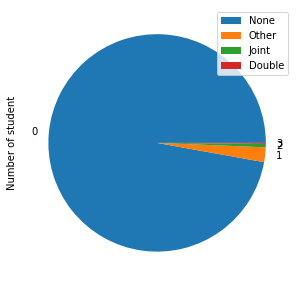

In [147]:
qualification_at_host.reset_index()
qualification_at_host.rename(columns={"index": "Qualification", "QUALIFICATIONATHOST": "Number of student"},inplace=True)
plot = qualification_at_host.plot.pie(y="Number of student", figsize=(5, 5)).legend(["None","Other","Joint","Double"])

Conclusion: The majority of students received no qualifications. Only a small proportion of them got Double, Joint or Other qualifications

## 3.13 Conclusion for the dataset of exchange student with work placement:
### Quantitative data:
#### + Placement grant has a positive correlation with the length of work placement, ECTS credit earned from work placement, but negative correlation with subject area. ECTS Credits earned from work placement also has a positive correlation with length of placement, but a negative correlation with age, years prior this exchange.
### - Qualitative data:
#### + Gender: Female students were more likely to engage in work placement exchange, but they received a bit less than male counterparts.
#### + Nationality: people from the west of European were more likely to join work placement exchange (e.g: France, Germany, Spain, UK, Italy). However, they were not the ones that received higher workplacement grants. People from Mediterranean sea and North sea area like Cyprus, Greece UK, Ireland, Iceland were among those who received the higher grands.
#### + Subject: Those with social and business backgrounds are more engaging in work placement exchange than those from science and technology background.
#### + Work placement grants: Large-sized businesses tend to pay more in work placement than medium- and small-sized businesses. And those in sectors of information, communication, and financial sectors offered higher placement grant to students, compared to other sectors.
#### + Credit received and qualifications: The majority of students received no credits from their work placement and this is compatible with the fact that most of the exchange students received no qualification from this exchange.
#### + Language usage and language preparation: even though the majority of students did not have to undergo language preparation course prior the exchange, they used the same language with that of the host countries.


## 4. Dataset of exchange students without work placement: 

In [148]:
import numpy as np
student_without_workplacement=data[~data.WORKPLACEMENT.notnull()]

In [149]:
student_without_workplacement.head()

,HOMEINSTITUTION,COUNTRYCODEOFHOMEINSTITUTION,AGE,GENDER,NATIONALITY,SUBJECTAREA,LEVELSTUDY,YEARSPRIOR,MOBILITYTYPE,HOSTINSTITUTION,...,ECTSCREDITSWORK,TOTALECTSCREDITS,SEVSUPPLEMENT,TAUGHTHOSTLANG,LANGUAGETAUGHT,LINGPREPARATION,STUDYGRANT,PLACEMENTGRANT,PREVIOUSPARTICIPATION,QUALIFICATIONATHOST
36,HU BUDAPES02,HU,23,F,HU,524,2,4,S,D BREMEN04,...,0,30,0,Y,DE,NN,1400.0,0.0,N,N
37,HU BUDAPES02,HU,21,M,HU,443,1,3,S,D COTTBUS01,...,0,28,0,Y,DE,HS,0.0,0.0,N,N
38,HU BUDAPES02,HU,23,F,HU,443,1,2,S,D COTTBUS01,...,0,28,0,Y,DE,HS,0.0,0.0,N,N
39,HU BUDAPES02,HU,22,F,HU,344,1,3,S,D DEGGEND01,...,0,28,0,N,EN,NN,1400.0,0.0,N,N
40,HU BUDAPES02,HU,22,F,HU,344,1,3,S,D DEGGEND01,...,0,25,0,N,EN,HS,1400.0,0.0,N,N


In [150]:
new_data_2 = student_without_workplacement.duplicated().sum()

In [151]:
new_data_2.corr()

AttributeError: 'numpy.int64' object has no attribute 'corr'

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(new_data_2.corr(),annot=True)

AttributeError: 'numpy.int64' object has no attribute 'corr'

<Figure size 720x720 with 0 Axes>

In [ ]:
student_without_workplacement.drop(columns=["HOSTINSTITUTION","COUNTRYCODEOFHOSTINSTITUTION","STUDYSTARTDATE","ECTSCREDITSSTUDY","STUDYGRANT", "LENGTHPLACEMENT", "ECTSCREDITSWORK"], axis=1,inplace=True)

In [ ]:
gender_2=pd.DataFrame(new_data_2.GENDER.value_counts())
gender_2.reset_index()
gender_2.rename(columns={"index": "Female/Male", "GENDER": "Number of student"},inplace=True)

In [ ]:
gender_grant_2=new_data_2[["GENDER","STUDYGRANT"]]
gender_grant_2 

In [ ]:
gender_grant_df_2=pd.pivot_table(gender_grant_2, values='STUDYGRANT', index=['GENDER'],  aggfunc=np.average)
gender_grant_df_2.reset_index()

In [ ]:
gender_grant_df_2.rename(columns={"GENDER": "Gender", "STUDYGRANT": "Amount of study grant"},inplace=True)

In [ ]:
plot_2_2 = gender_grant_df_2.plot.pie(y='Amount of study grant', autopct = "%.2f", figsize=(5, 5)).legend(["Female","Male"])

In [ ]:
new_data_2.SUBJECTAREA.unique()

In [ ]:
subject_area_2=pd.DataFrame(new_data_2.SUBJECTAREA.value_counts())

In [ ]:
top_10_2=subject_area_2[:10]
top_10_2

In [ ]:
s_2 = top_10_2.index.to_series()

In [ ]:
dict_2={222:"Foreign languages", 34:"Business and administration",340:"Business and administration (broad)", 314:"Economics"
                ,345:"Management and administration", 38:"_"
                ,313:"_",721:"Medicine", 52:"Engineering and engineering trades",
                514:"_", 223:"_", }

In [ ]:
top_10_2.index = np.array(s.map(dict_2).fillna(s),ndmin =1)
top_10_2  
top_10_2.plot.barh(xlabel='Subjects', rot = 0, title = 'Number of students', legend = False)

in this case, veterinary is not the main exchange field in comparison to placement exchange. It is relevant to see that foreign languages is the top exchange program followed by business and administration

### Analysis of study language

taught_host_lang_2


In [ ]:
taught_host_lang_2.rename(columns={"index": "Yes/No", "TAUGHTHOSTLANG": "Number of student"},inplace=True)

In [ ]:
plot_2_3 = taught_host_lang_2.plot.pie(y='Number of student',autopct = "%.2f", figsize=(5, 5)).legend(["Yes","No"])

In this case similar values were obtained in comparison to the work placement language, but being slightly superior the numbers in this case